<a href="https://colab.research.google.com/github/Marvel280904/W8---DataMining---Marvel/blob/main/%5BQuestion%5D_Exercise_Week_8_KMeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
!pip install kneed
from kneed import KneeLocator

# Exercise 1: Clustering Method

In this exercise we will explore how each clustering algorithm discussed in the class works.

## Load Dataset

The dataset that we will use is a **customer transaction in a certain mall**. In this dataset there will 4 features including Gender, Age, Annual Income, and Spending Score. You can get the dataset from **Elearn**

In [46]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/Marvel280904/W8---DataMining---Marvel/refs/heads/main/mall_customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [47]:
# rename the Annual Income (k$)	Spending Score (1-100) column
df = df.rename(columns={"Annual Income (k$)": "AnnualIncome"})
df = df.rename(columns={"Spending Score (1-100)": "SpendingScore"})
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [48]:
# describe data
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [49]:
# Check for null values in the dataset
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
AnnualIncome,0
SpendingScore,0


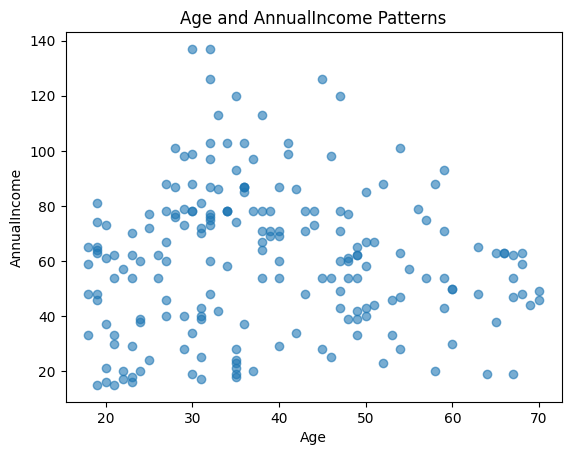

In [50]:
# make an insightful visualization and explain
plt.scatter(df["Age"], df["AnnualIncome"], alpha=0.6)
plt.xlabel("Age")
plt.ylabel("AnnualIncome")
plt.title("Age and AnnualIncome Patterns")
plt.show()

Grafik menunjukkan hubungan antara Age dan Annual Income. Titik-titik tersebar acak, menandakan bahwa tidak ada hubungan linear yang kuat antara usia dan pendapatan. Sebagian besar pendapatan tahunan berkisar antara 40-100 ribu dolar di berbagai rentang usia. Ini menunjukkan bahwa usia bukan faktor utama yang memengaruhi pendapatan dalam dataset ini.

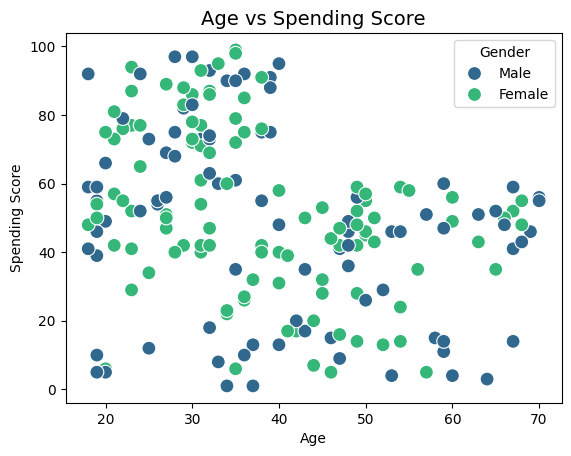

In [51]:
# make an insightful visualization and explain
plt.subplot(1, 1, 1)
sns.scatterplot(data=df, x='Age', y='SpendingScore', hue='Gender', palette='viridis', s=100)
plt.title('Age vs Spending Score', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend(title='Gender')

Secara umum, tidak terlihat pola yang jelas antara umur dan skor pengeluaran, tetapi terdapat beberapa pengelompokan. Sebagai contoh, banyak individu dengan umur sekitar 20-40 tahun memiliki skor pengeluaran yang lebih bervariasi, sedangkan di sekitar usia 50 tahun ada sedikit pengelompokan dengan skor pengeluaran menengah. Visualisasi ini mungkin digunakan untuk menganalisis kebiasaan belanja berdasarkan umur dan jenis kelamin, tetapi data ini menunjukkan variasi yang cukup tinggi.

## Data Preprocessing

For this case study, we only use income and spending score

In [52]:
# create new dataframe that consist only annual income and spending score
df = df.iloc[:, -2:]
df.head()

,AnnualIncome,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


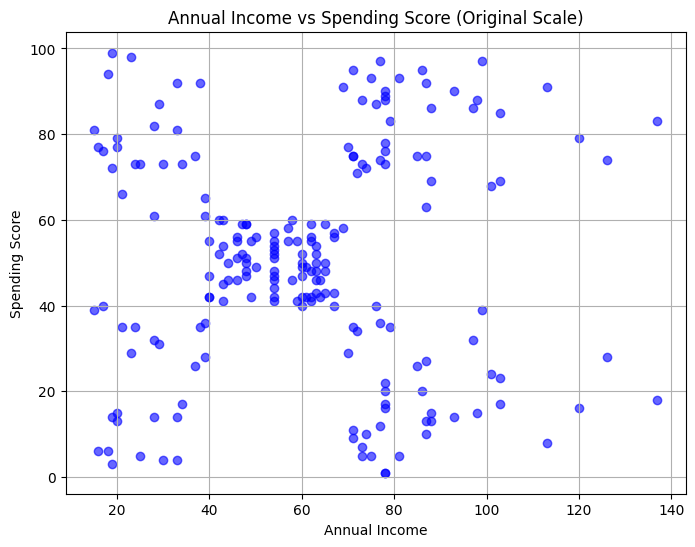

In [53]:
# Visualize the position using the original scale
plt.figure(figsize=(8, 6))
plt.scatter(df['AnnualIncome'], df['SpendingScore'], color='blue', alpha=0.6)
plt.title("Annual Income vs Spending Score (Original Scale)")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.grid(True)
plt.show()

Before we analyze our data, we need to scale the data. You can use MinMaxScaler or StandardScaler.

In [54]:
# scale dataset with standard scaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df = pd.DataFrame(sc.fit_transform(df), columns=["AnnualIncome", "SpendingScore"])
df.head()

,AnnualIncome,SpendingScore
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [55]:
# get stastical information on the new dataset
df.describe()

,AnnualIncome,SpendingScore
count,2.000000e+02,2.000000e+02
mean,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00
min,-1.738999e+00,-1.910021e+00
25%,-7.275093e-01,-5.997931e-01
50%,3.587926e-02,-7.764312e-03
75%,6.656748e-01,8.851316e-01
max,2.917671e+00,1.894492e+00


Then, we check the inisial position for our sample. You may use pairplot or scattered chart for the visualization option.

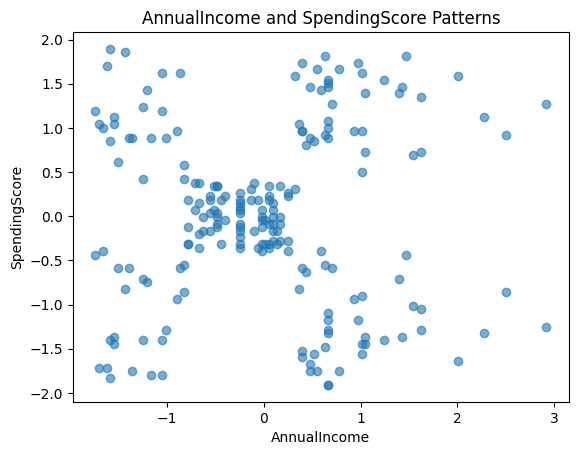

In [56]:
# Visualize the position
plt.scatter(df["AnnualIncome"], df["SpendingScore"], alpha=0.6)
plt.xlabel("AnnualIncome")
plt.ylabel("SpendingScore")
plt.title("AnnualIncome and SpendingScore Patterns")
plt.show()

## Clustering

The evaluation for chosing the number of K in KMEANS can be done by several methods such as elbow method.

1. using elbow method
In this case study, the below parameter settings is used:
- init: random
- range: (1,11)
- max_iter: 300
- random state: 42

In [57]:
# set the parameter for evaluating K
from sklearn.cluster import KMeans

sse=[]
# check the inertia for each K
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=300, random_state=42)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

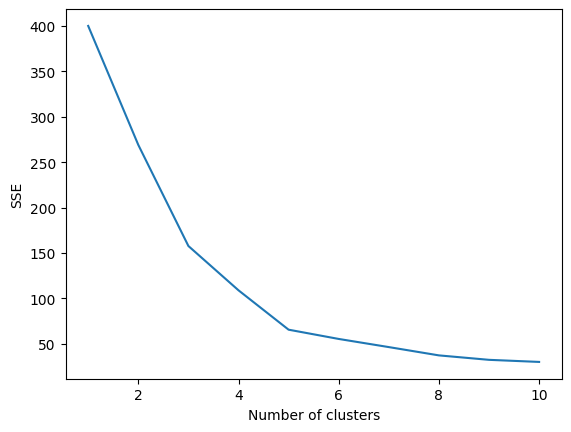

In [58]:
# manually visualize the elbow method using plotlib
plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [59]:
# using kneelocator to find the elbow/knee
kneedle = KneeLocator(range(1,11), sse, curve="convex", direction="decreasing")
print("The best k for you model is", kneedle.elbow)

The best k for you model is 5


### K-Means Algorithm

For using KMeans clustering algorithm, you need to define the number of cluster, initialization number, number of iteration, and random state.

In this case study, the below parameter settings is used:
- centroid initialization: random
- number of cluster: 5
- number of iteration: 300
- random state: 42

In [60]:
# assign cluster with K-Means algorithm
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, init='random', max_iter=300, random_state=42)
y_pred = kmeans.fit_predict(df)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 4,
       0, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 3, 4, 3, 2, 3, 2, 3,
       4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

Visualize your result based on income and spending. You also can show the final position of the centroid.

<ipython-input-61-2b222c75aed2>:3: UserWarning: 
The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x = "AnnualIncome", y = "SpendingScore", hue=y_pred, palette=["blueviolet", "red", "deepskyblue"], data=df, s = 60)


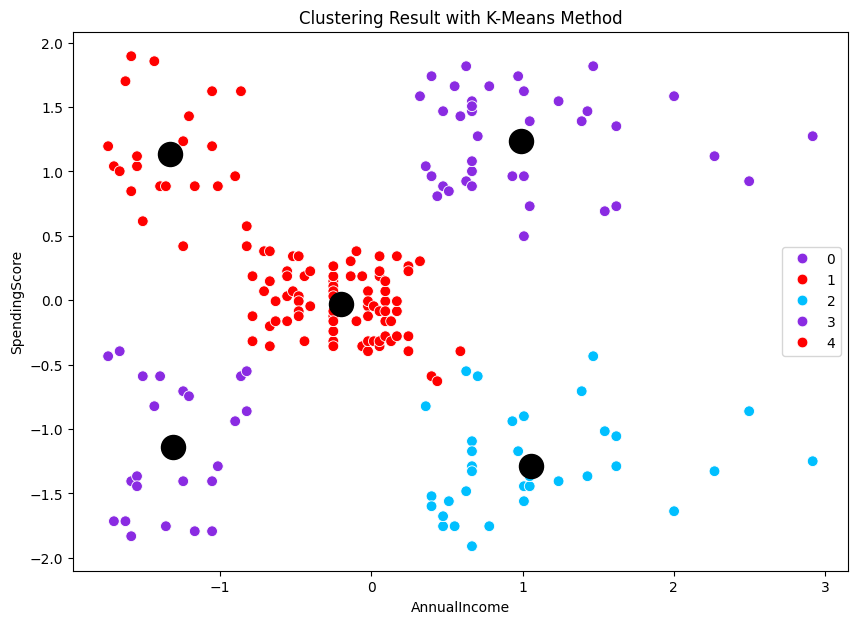

In [61]:
# visualize the result using scater chart
plt.figure(figsize=(10,7))
sns.scatterplot(x = "AnnualIncome", y = "SpendingScore", hue=y_pred, palette=["blueviolet", "red", "deepskyblue"], data=df, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c="black")
plt.xlabel("AnnualIncome")
plt.ylabel("SpendingScore")
plt.title("Clustering Result with K-Means Method")
plt.show()

In [62]:
# Inverse transform the scaled data to get the original values
df = pd.DataFrame(sc.inverse_transform(df), columns=["AnnualIncome", "SpendingScore"])

# Add the cluster labels to the original data
df['Cluster'] = y_pred

# analyze the clusters with the original values
df.head()

,AnnualIncome,SpendingScore,Cluster
0,15.0,39.0,0
1,15.0,81.0,1
2,16.0,6.0,0
3,16.0,77.0,1
4,17.0,40.0,0


In [63]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df.groupby(y_pred).agg({'AnnualIncome': ['mean', 'std', 'min', 'max'],
                                          'SpendingScore': ['mean', 'std', 'min', 'max']})

cluster_summary = cluster_summary.rename_axis('cluster')

cluster_summary

AnnualIncome                         SpendingScore                   \
                mean        std   min    max          mean        std   min   
cluster                                                                       
0          26.304348   7.893811  15.0   39.0     20.913043  13.017167   3.0   
1          25.727273   7.566731  15.0   39.0     79.363636  10.504174  61.0   
2          88.200000  16.399067  70.0  137.0     17.114286   9.952154   1.0   
3          86.538462  16.312485  69.0  137.0     82.128205   9.364489  63.0   
4          55.296296   8.988109  39.0   76.0     49.518519   6.530909  34.0   

               
          max  
cluster        
0        40.0  
1        99.0  
2        39.0  
3        97.0  
4        61.0

Write down (by adding text) the results of your interpretation and provide suggestions on what steps the company can take based on the clustering results you have created.

# Interpretasi Cluster

* Cluster 0:

  1. Karakteristik: Individu dalam cluster ini memiliki pendapatan tahunan yang relatif rendah (rata-rata ≈ 26) dan skor pengeluaran yang rendah (rata-rata ≈ 21).
  2. Interpretasi: Kemungkinan merupakan pelanggan yang cenderung hemat atau memiliki daya beli terbatas, mungkin karena keterbatasan finansial.
  3. Saran: Targetkan kelompok ini dengan produk terjangkau, diskon, atau program loyalitas untuk mendorong pembelian ulang.

* Cluster 1:

  1. Karakteristik: Pendapatan rendah (rata-rata ≈ 25) tetapi skor pengeluaran tinggi (rata-rata ≈ 79).
  2. Interpretasi: Individu dalam kelompok ini menghabiskan sebagian besar pendapatannya. Mereka mungkin menghargai produk/jasa tertentu atau menyukai pengalaman premium meskipun dengan anggaran terbatas.
  3. Saran: Berikan penawaran eksklusif atau paket premium berukuran kecil untuk memenuhi preferensi mereka terhadap pembelian bernilai tinggi meskipun dengan pendapatan yang lebih rendah.

* Cluster 2:

  1. Karakteristik: Pendapatan tinggi (rata-rata ≈ 88) dan skor pengeluaran rendah (rata-rata ≈ 17).
  2. Interpretasi: Pelanggan dengan pendapatan tinggi yang tidak sering atau tidak suka membelanjakan banyak. Mereka mungkin lebih selektif atau berhati-hati dalam pengeluaran.
  3. Saran: Pertimbangkan penawaran personal yang berkualitas tinggi atau promosi yang menekankan pada kualitas dan eksklusivitas produk, yang mungkin menarik bagi kebiasaan belanja selektif mereka.

* Cluster 3:

  1. Karakteristik: Pendapatan tinggi (rata-rata ≈ 87) dan skor pengeluaran tinggi (rata-rata ≈ 82).
  2. Interpretasi: Pelanggan dengan pendapatan tinggi dan pengeluaran tinggi, kemungkinan merupakan segmen premium perusahaan yang tidak dibatasi anggaran dan mungkin mencari produk mewah atau eksklusif.
  3. Saran: Fokus pada produk premium, layanan eksklusif, dan program loyalitas yang ditujukan untuk mempertahankan pelanggan bernilai tinggi ini. Layanan personal atau pengalaman VIP juga bisa sangat efektif.

* Cluster 4:

  1. Karakteristik: Pendapatan sedang (rata-rata ≈ 55) dan skor pengeluaran sedang (rata-rata ≈ 50).
  2. Interpretasi: Pelanggan dengan pendapatan menengah dan kebiasaan belanja yang seimbang.
  3. Saran: Kelompok ini mungkin akan merespon baik terhadap penawaran yang berorientasi pada nilai, paket bundel, atau promosi yang menekankan kualitas dengan harga yang wajar. Mereka cocok untuk produk-produk umum.

# Rekomendasi untuk Perusahaan
1. Pemasaran Tersegmentasi: Desain strategi pemasaran yang ditargetkan berdasarkan kebutuhan dan karakteristik setiap cluster untuk meningkatkan keterlibatan pelanggan dan memaksimalkan pengeluaran.
2. Program Loyalitas: Terapkan program loyalitas bertingkat yang memberikan hadiah berdasarkan pola pengeluaran, menarik pelanggan dengan pengeluaran tinggi (Cluster 3) dengan penawaran eksklusif dan memberikan diskon kecil tapi sering untuk cluster yang hemat.
3. Diversifikasi Produk: Tawarkan campuran produk premium dan terjangkau untuk melayani segmen berpenghasilan tinggi (Cluster 3) dan segmen yang hemat (Cluster 0).
4. Personalisasi: Gunakan komunikasi yang dipersonalisasi, terutama untuk pelanggan berpenghasilan tinggi yang selektif (Cluster 2), dengan merekomendasikan produk sesuai preferensi mereka.
5. Promosi dan Paket Bundel: Dorong pengeluaran pada pelanggan berpenghasilan menengah yang seimbang (Cluster 4) dengan penawaran paket bundel yang menambah nilai tanpa menaikkan harga secara signifikan.